## 1. Business case : Predict the person will donate blood or not.

This data set is about blood donation prediction.This dataset contains blood donation details of regular university visits. The goal is to predict whether the person has donated blood in March 2007. The target is to predict whether a donor will give blood the next time in the blood donation campaign held at the university campus.

#### Problem Statement:
* Create a predictive model which will help to repeat blood donations amongst donors based on a limited number of attributes.
* Prepare a complete data analysis report on the given data.

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#loading datasets
data=pd.read_csv('Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv')
data

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0
...,...,...,...,...,...,...
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0


### DOMAIN ANALYSIS :

* 1.) Months since Last Donation: this is the number of months since this donor's most recent donation.
* 2.) Number of Donations : this is the total number of donations that the donor has made.
* 3.) Total Volume Donated : this is the total amound of blood that the donor has donated in cubuc centimeters.
* 4.) Months since First Donation : this is the number of months since the donor's first donation
* 5.) Made Donation in March 2007 : a binary variable representing whether he/she donated blood in March 2007 (1 stand for       
      donating blood; 0 stands for not donating blood).

#### Basic Checks

In [3]:
data.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [4]:
data.tail()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0
575,74,72,1,250,72,0


In [5]:
data.shape

(576, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Unnamed: 0                   576 non-null    int64
 1   Months since Last Donation   576 non-null    int64
 2   Number of Donations          576 non-null    int64
 3   Total Volume Donated (c.c.)  576 non-null    int64
 4   Months since First Donation  576 non-null    int64
 5   Made Donation in March 2007  576 non-null    int64
dtypes: int64(6)
memory usage: 27.1 KB


* There's no null value.

In [7]:
data.describe()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


In [8]:
data.duplicated().sum()

0

## Vizualization

#### 1.) Univariate Analysis :-

In [9]:
import sweetviz as sv
my_repo=sv.analyze(data)
my_repo.show_html('myrepo.html')

                                             |      | [  0%]   00:00 -> (? left)

Report myrepo.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Insights :-

* Months Last Donation ranges from 0 to 74.
* Two values more than 70
* Total donation ranges from 1 to 50.
* There are 4 values more than 40 in total donation.
* There are 80% donors who have total volume donation count is between 250 c.c. to 2000 c.c.
* There are 12 donors who have more than 90 months since first blood donation. 
* There are 438 obsevations are lie in negative class.

#### 2.) Bivariate Analysis

In [10]:
data.columns

Index(['Unnamed: 0', 'Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation',
       'Made Donation in March 2007'],
      dtype='object')

In [11]:
data.rename({'Made Donation in March 2007' : 'Made_Donation_in_March_2007'},axis=1,inplace=True)

In [12]:
data

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made_Donation_in_March_2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0
...,...,...,...,...,...,...
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0


In [13]:
data1 = data[['Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation']]
data1

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77
...,...,...,...,...
571,23,1,250,23
572,16,3,750,86
573,21,2,500,52
574,39,1,250,39


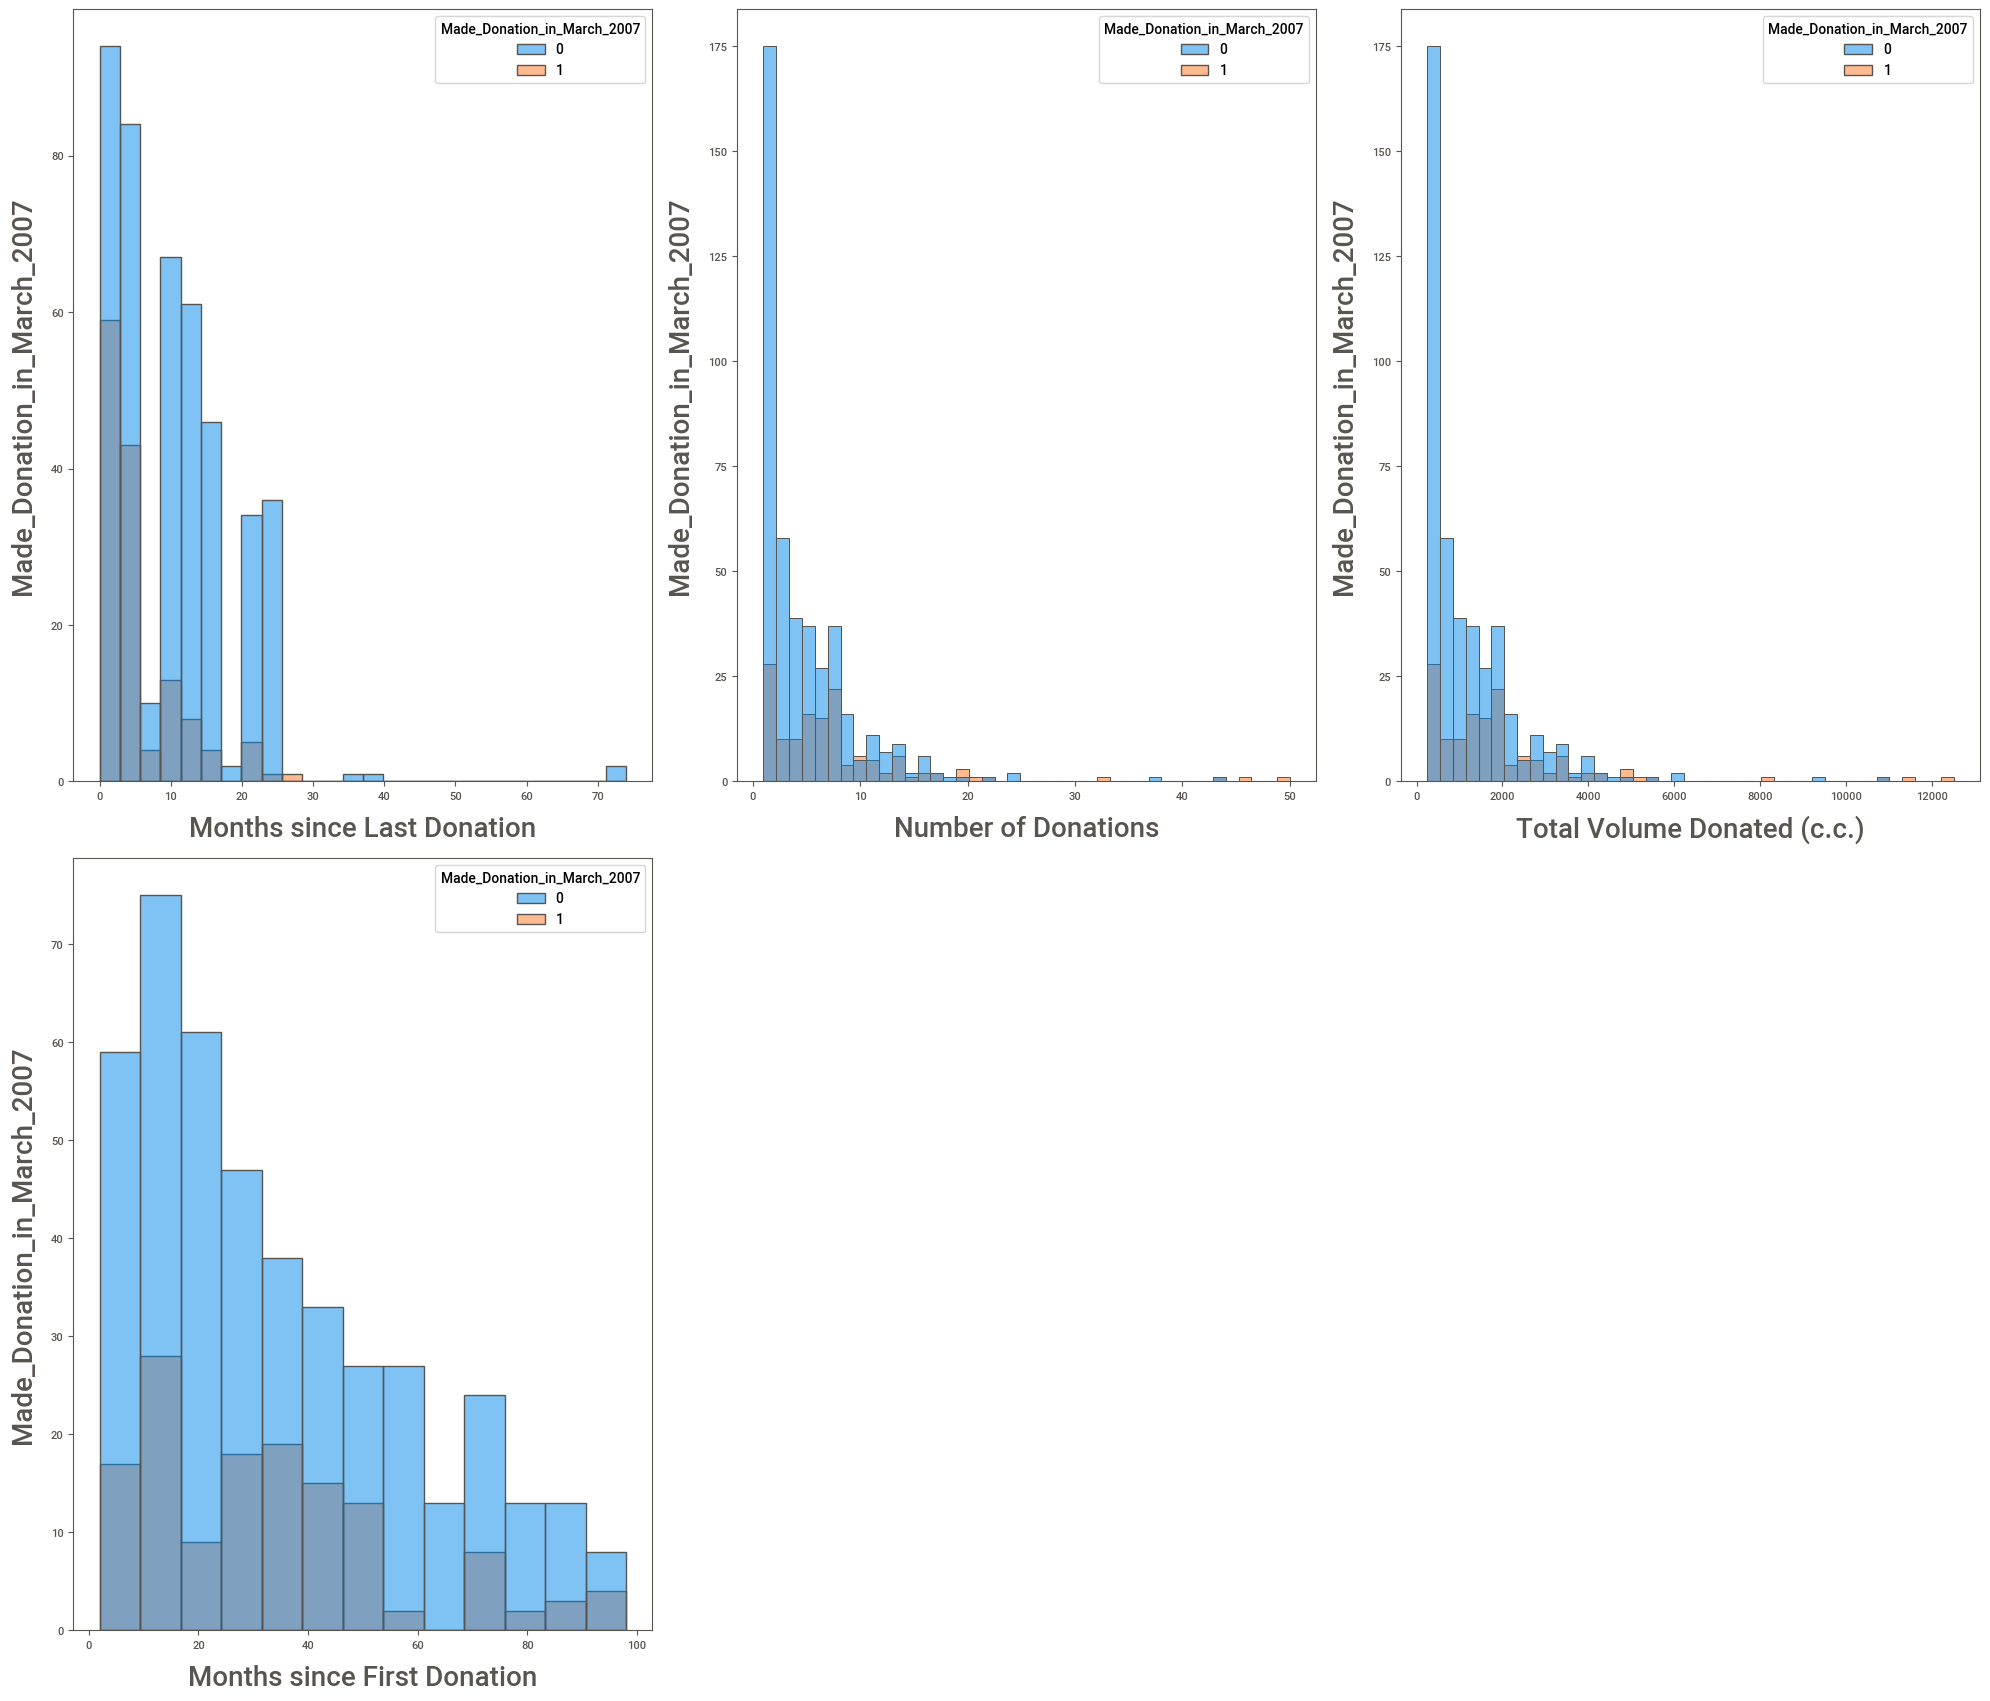

In [14]:
plt.figure(figsize=(20,25)) 
plotnumber = 1

for column in data1:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(x=data1[column],hue=data.Made_Donation_in_March_2007)
        plt.xlabel(column,fontsize=20,labelpad=10)
        plt.ylabel('Made_Donation_in_March_2007',fontsize=20,labelpad=10)
    plotnumber+=1
plt.tight_layout()

Insights :-

* The number of donors who could not donate blood is more than those who donated blood 10 months ago and still can donate blood  in March 2007.
* There is not a single donor whose last blood donation is between 40 to 70 months.
* Who has done blood donation 2 times and in March 2007 also there are around 30 donors who can donate blood and around 175 who can not donate blood.
* Donors whose number of donation is more than 45 times can donate blood in March-2007. 
* Donors whose blood donut count is more than 15000 cc can donate blood in March-2007.
* The number of donors whose first donation is between 25 to 50 months is high and they can do it even in March-2007.

### Data Preprocessing

In [15]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [16]:
df=pd.read_csv('Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv')

In [17]:
df

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0
...,...,...,...,...,...,...
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0


In [18]:
df.info()       ## Checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Unnamed: 0                   576 non-null    int64
 1   Months since Last Donation   576 non-null    int64
 2   Number of Donations          576 non-null    int64
 3   Total Volume Donated (c.c.)  576 non-null    int64
 4   Months since First Donation  576 non-null    int64
 5   Made Donation in March 2007  576 non-null    int64
dtypes: int64(6)
memory usage: 27.1 KB


In [19]:
df.describe()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


In [20]:
df.duplicated().sum()

0

In [21]:
df.drop('Unnamed: 0',axis=1,inplace=True)    ### Dropping Unnamed: 0

In [22]:
df

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
571,23,1,250,23,0
572,16,3,750,86,0
573,21,2,500,52,0
574,39,1,250,39,0


### Handling Outliers

In [23]:
df.columns

Index(['Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation',
       'Made Donation in March 2007'],
      dtype='object')

In [24]:
df2=df[['Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation']]

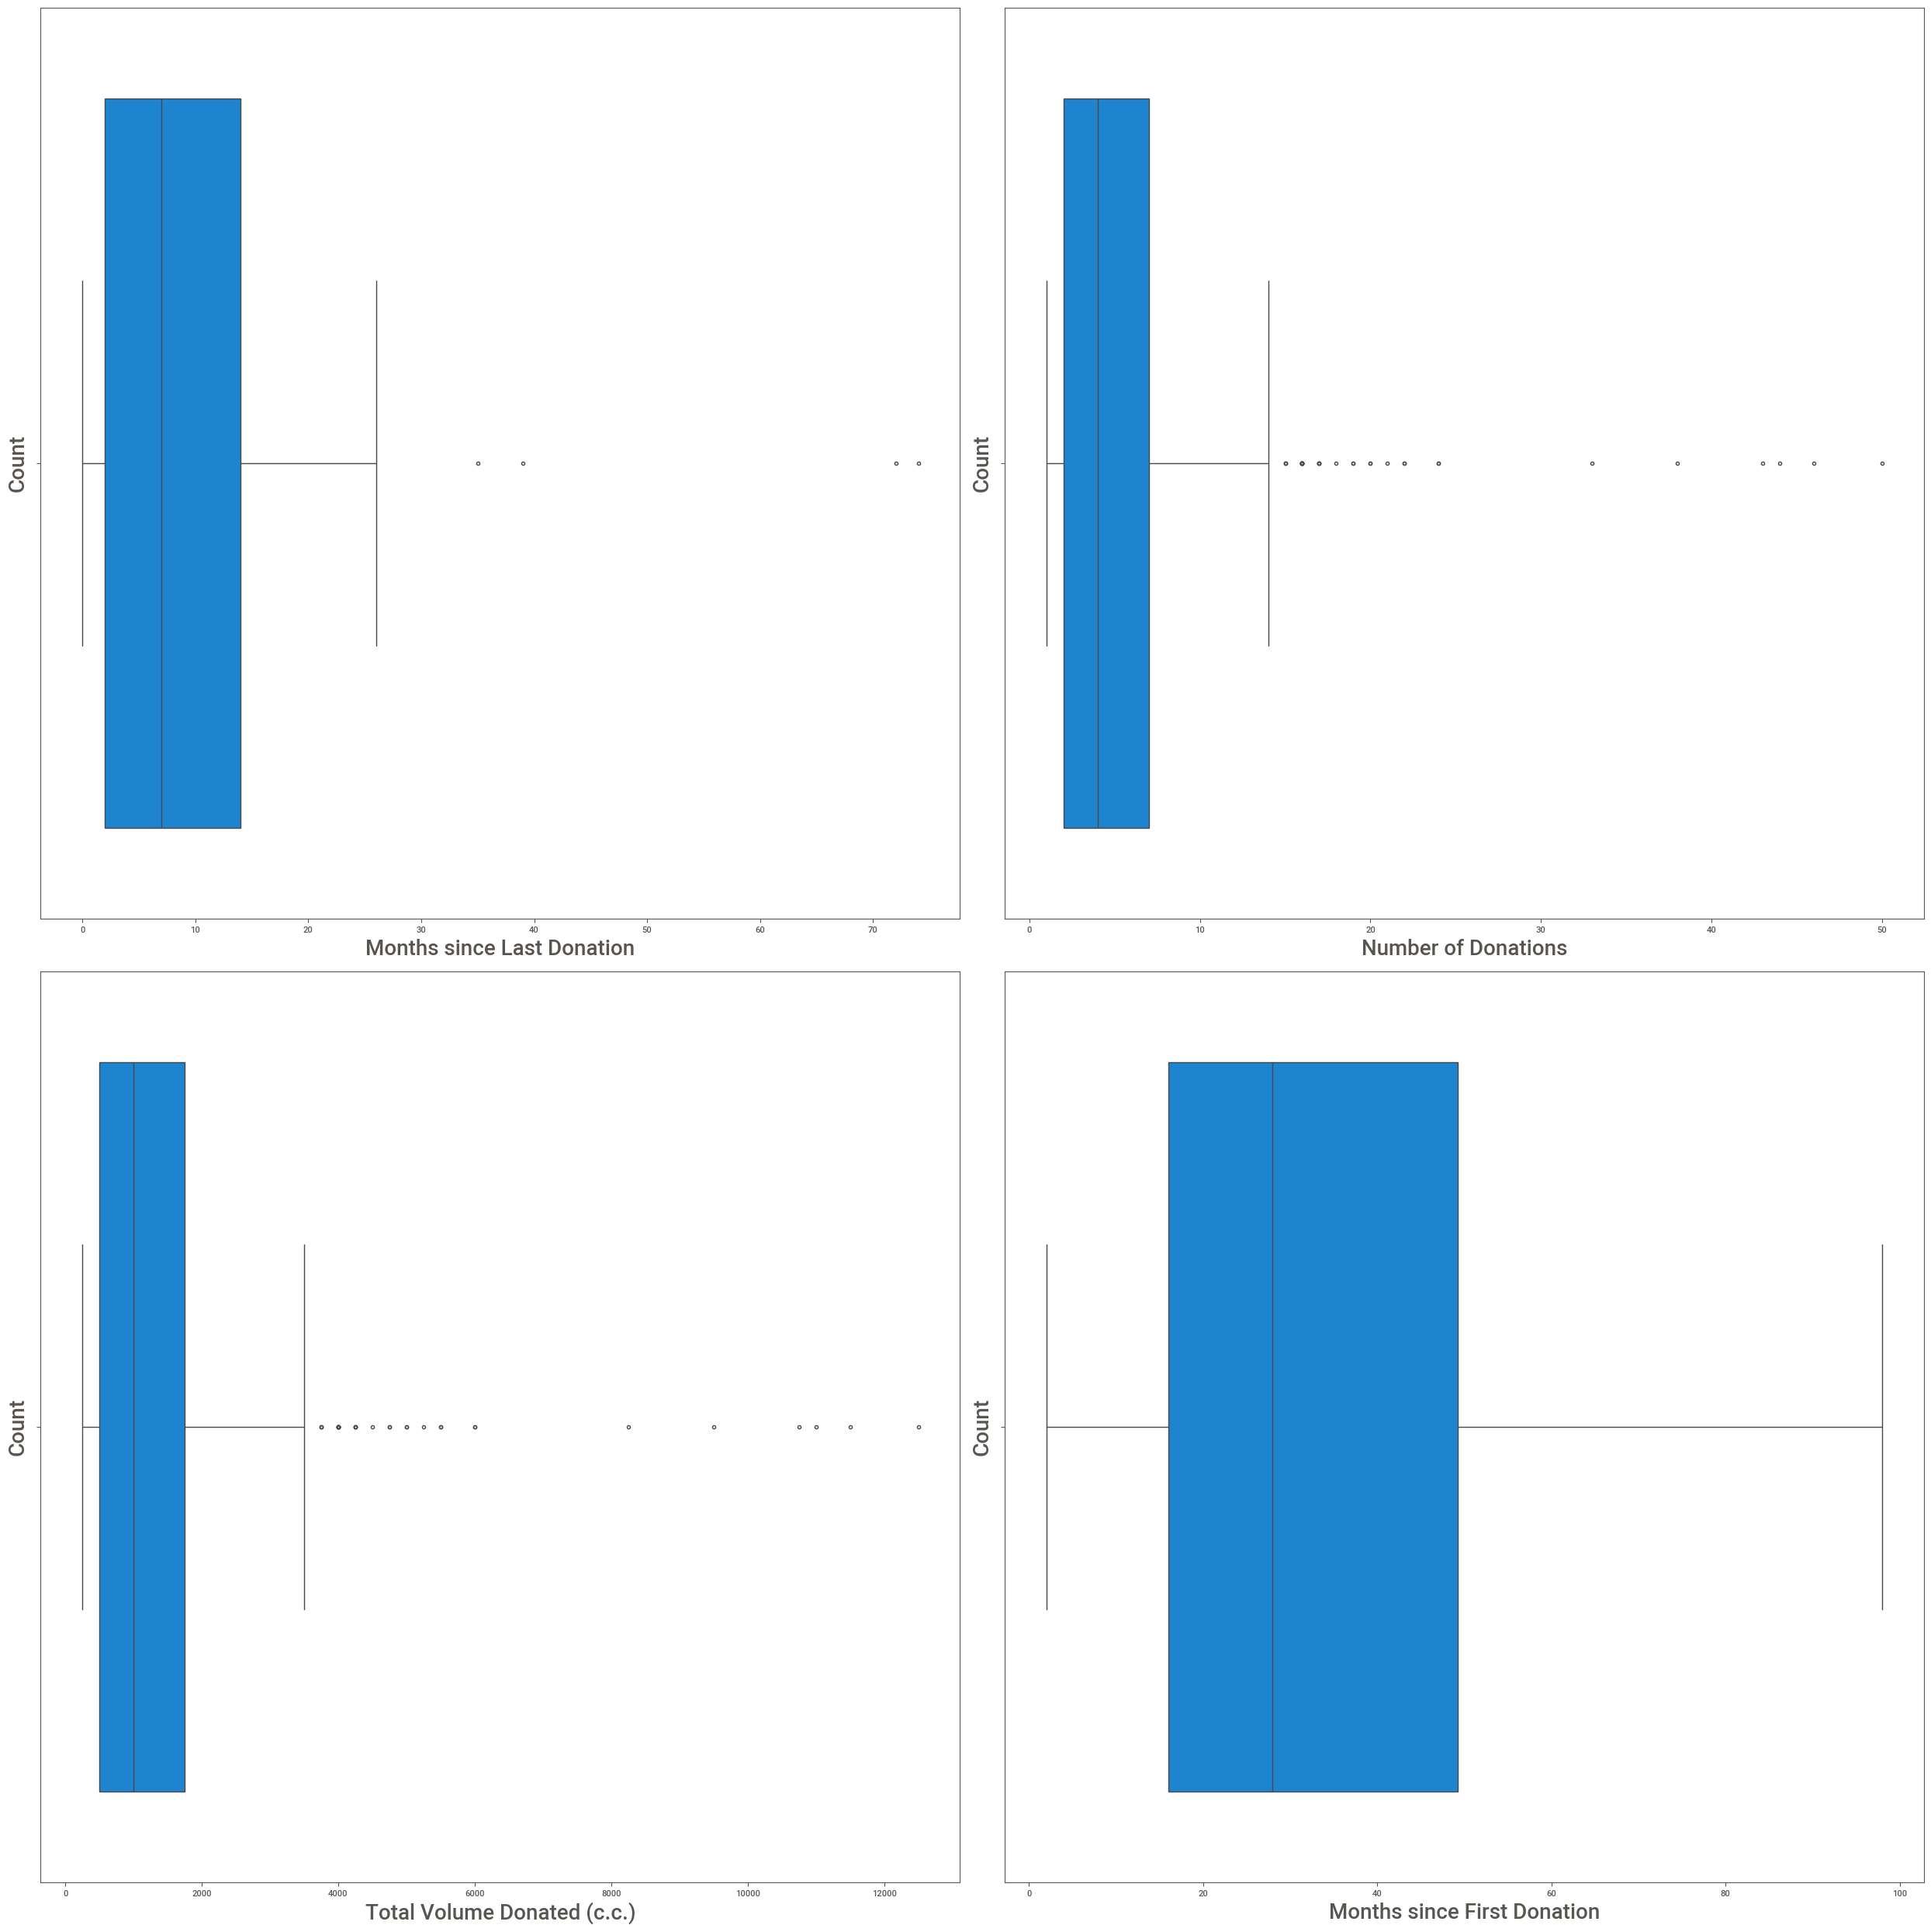

In [25]:
# Checking for Outliers
plt.figure(figsize=(25,25),facecolor='white')
pltno=1
for column in df2:
    if pltno<=5:
        ax=plt.subplot(2,2,pltno)
        sns.boxplot(x=df2[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    pltno+=1
plt.tight_layout()       ### Checking for outliers using Boxplot

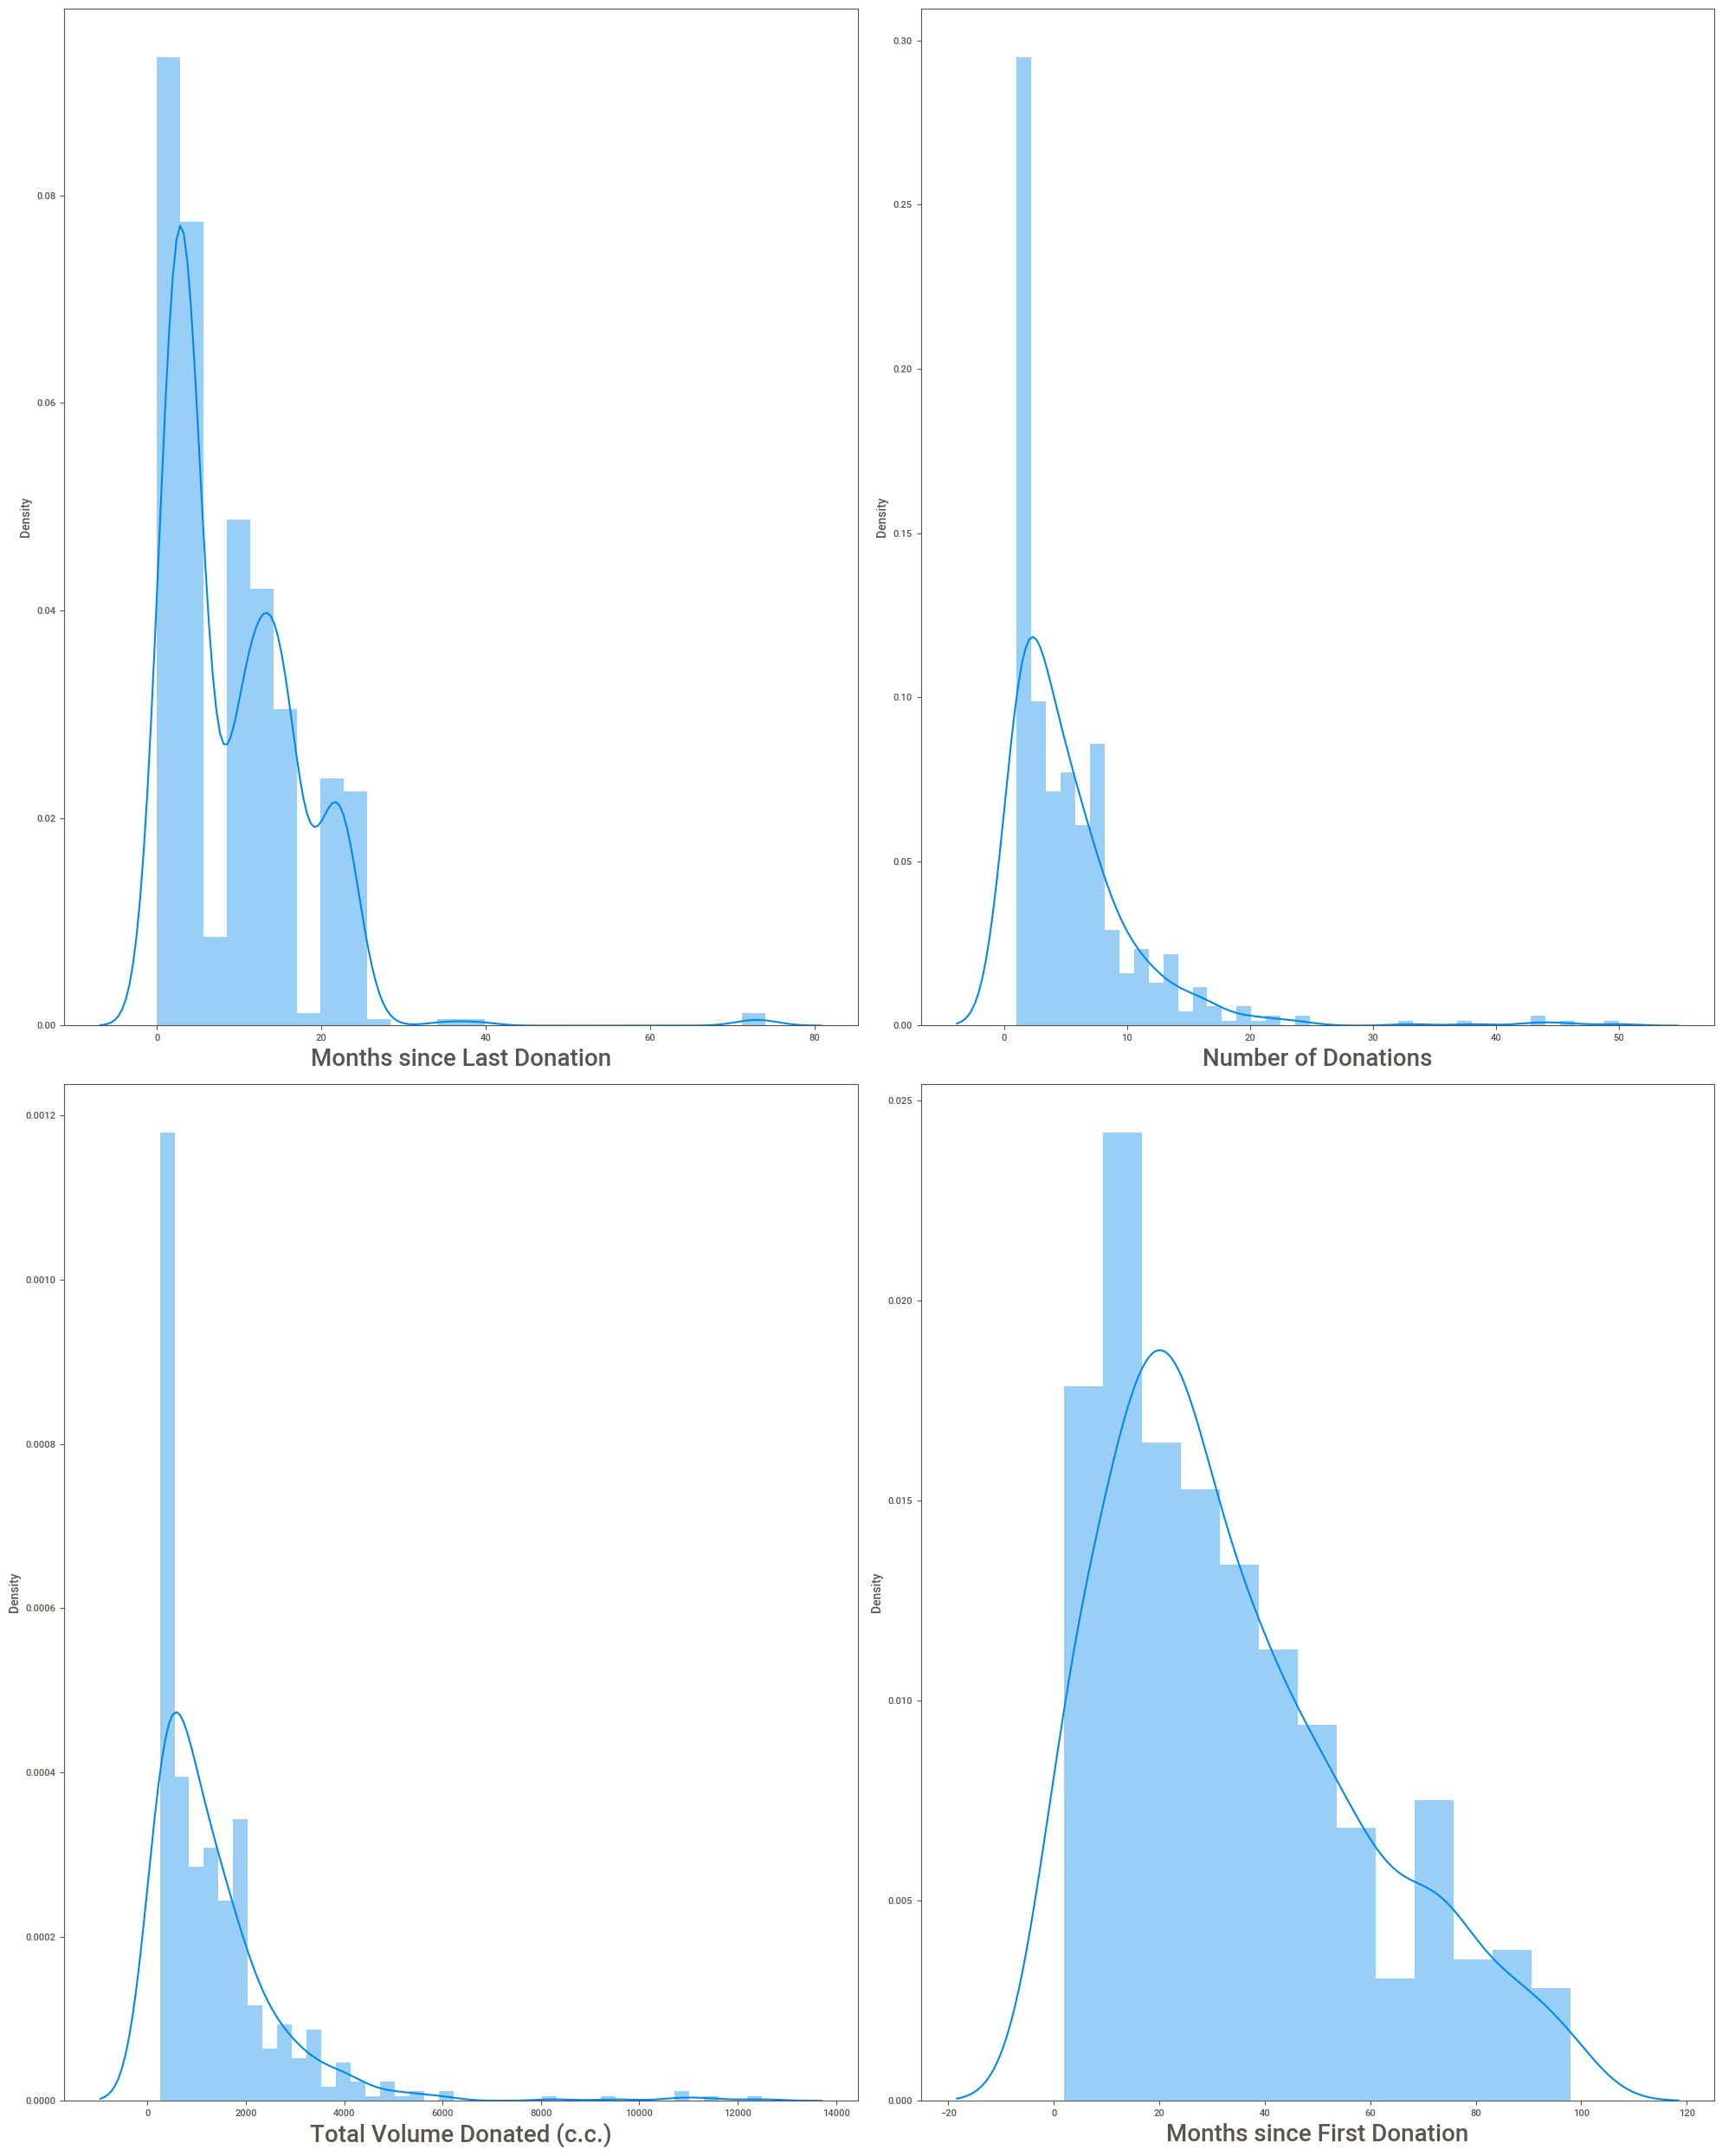

In [26]:
plt.figure(figsize=(20,25), facecolor='white')
pltno=1
for column in df2:
    if pltno<=5:
        ax=plt.subplot(2,2,pltno)
        sns.distplot(x=df2[column])
        plt.xlabel(column,fontsize=20)
    pltno+=1
plt.tight_layout()        #Checking the Skewness of different columns

In [27]:
df=df.rename(columns={'Months since Last Donation':'ld', 'Number of Donations':'Number',
       'Total Volume Donated (c.c.)':'Volume', 'Months since First Donation':'fd'})    ### renaming columns

In [28]:
df

,ld,Number,Volume,fd,Made Donation in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
571,23,1,250,23,0
572,16,3,750,86,0
573,21,2,500,52,0
574,39,1,250,39,0


#### Last donation

In [29]:
iqr=stats.iqr(df.ld,interpolation='midpoint')
q1=df.ld.quantile(0.25)
q3=df.ld.quantile(0.75)
min_limit=q1-1.5*iqr
max_limit=q3+1.5*iqr
print('IQR =',iqr)
print('min_limit',min_limit)
print('max_limit',max_limit)


IQR = 12.0
min_limit -16.0
max_limit 32.0


In [30]:
df.loc[df['ld']<min_limit]      # Checking values less than min limit

,ld,Number,Volume,fd,Made Donation in March 2007


In [31]:
df.loc[df['ld']>max_limit,'ld']=np.median(df.ld)

In [32]:
df.loc[df['ld']>max_limit]

,ld,Number,Volume,fd,Made Donation in March 2007


#### Number

In [33]:
iqr=stats.iqr(df.Number,interpolation='midpoint')
q1=df.Number.quantile(0.25)
q3=df.Number.quantile(0.75)
min_limit=q1-1.5*iqr
max_limit=q3+1.5*iqr
print('IQR =',iqr)
print('min_limit',min_limit)
print('max_limit',max_limit)

IQR = 5.0
min_limit -5.5
max_limit 14.5


In [34]:
df.loc[df['Number']>max_limit]

,ld,Number,Volume,fd,Made Donation in March 2007
0,2,50,12500,98,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
8,5,46,11500,98,1
15,2,15,3750,49,1
28,2,16,4000,64,0
37,4,20,5000,69,1
47,4,19,4750,69,1
53,3,16,4000,74,0


In [35]:
df.loc[df['Number']>max_limit,'Number']=np.median(df.Number)
df.loc[df['Number']>max_limit]

,ld,Number,Volume,fd,Made Donation in March 2007


### FD

In [36]:

iqr=stats.iqr(df.fd,interpolation='midpoint')
q1=df.fd.quantile(0.25)
q3=df.fd.quantile(0.75)
min_limit=q1-1.5*iqr
max_limit=q3+1.5*iqr
print('IQR =',iqr)
print('min_limit',min_limit)
print('max_limit',max_limit)

IQR = 33.5
min_limit -34.25
max_limit 99.5


In [37]:
df.loc[df['fd']<min_limit]

,ld,Number,Volume,fd,Made Donation in March 2007


In [38]:
df.loc[df['fd']>max_limit]

,ld,Number,Volume,fd,Made Donation in March 2007


In [39]:
df.loc[df['fd']>max_limit,'fd']=np.median(df.fd)
df.loc[df['fd']>max_limit]

,ld,Number,Volume,fd,Made Donation in March 2007


### Feature Engg

In [40]:
df.head()

,ld,Number,Volume,fd,Made Donation in March 2007
0,2,4,12500,98,1
1,0,13,3250,28,1
2,1,4,4000,35,1
3,2,4,5000,45,1
4,1,4,6000,77,0


In [41]:
df.corr()

,ld,Number,Volume,fd,Made Donation in March 2007
ld,1.000000,-0.184635,-0.150572,0.153669,-0.275395
Number,-0.184635,1.000000,0.536599,0.518697,0.191408
Volume,-0.150572,0.536599,1.000000,0.622116,0.220615
fd,0.153669,0.518697,0.622116,1.000000,-0.019819
Made Donation in March 2007,-0.275395,0.191408,0.220615,-0.019819,1.000000


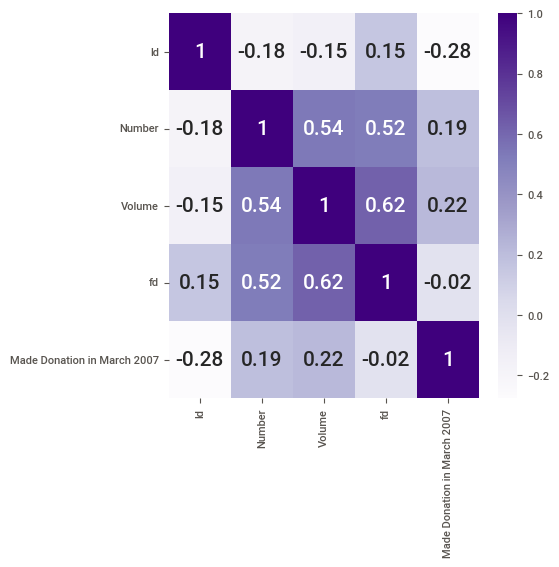

In [42]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True,annot_kws={"size":15},cmap="Purples")
plt.show()

we will drop number as it is showing high corr. 

In [43]:
df.drop(['Number'],axis=1,inplace=True)

In [44]:
df

,ld,Volume,fd,Made Donation in March 2007
0,2,12500,98,1
1,0,3250,28,1
2,1,4000,35,1
3,2,5000,45,1
4,1,6000,77,0
...,...,...,...,...
571,23,250,23,0
572,16,750,86,0
573,21,500,52,0
574,7,250,39,0


In [45]:
df=df.rename(columns={'Made Donation in March 2007':'Made_Donation_in_March_2007'})

## Model Creation

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
from sklearn.model_selection import RandomizedSearchCV

### Scaling
Now, we will normalize each numerical feature by using Standardscaler()

In [47]:
std=StandardScaler()

In [48]:
df[['ld', 'Volume','fd']] = std.fit_transform(df[['ld', 'Volume','fd']])
df.head()

,ld,Volume,fd,Made_Donation_in_March_2007
0,-1.005231,7.772052,2.641824,1
1,-1.288160,1.320468,-0.249946,1
2,-1.146695,1.843569,0.039231,1
3,-1.005231,2.541038,0.452341,1
4,-1.146695,3.238506,1.774293,0


## Define X and y

In [49]:
x = df.drop('Made_Donation_in_March_2007',axis = 1)
y = df.Made_Donation_in_March_2007
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

## Checking target data to see if it is balanced or not

In [50]:
y_train.value_counts()

Made_Donation_in_March_2007
0    351
1    109
Name: count, dtype: int64

* Data is not Balance

### Balancing the data using SMOTE

In [51]:
from imblearn.over_sampling import SMOTE

In [52]:
sm=SMOTE()
x_sm,y_sm=sm.fit_resample(x_train,y_train)

In [53]:
y_sm.value_counts()

Made_Donation_in_March_2007
0    351
1    351
Name: count, dtype: int64


## 1. Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

### Training

In [55]:
y_pred_train_rf = rf.predict(x_train)
a1=accuracy_score(y_train,y_pred_train_rf)
a1

0.9434782608695652

In [56]:
print(classification_report(y_train,y_pred_train_rf))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       351
           1       0.93      0.83      0.87       109

    accuracy                           0.94       460
   macro avg       0.94      0.90      0.92       460
weighted avg       0.94      0.94      0.94       460



### Testing

In [57]:
y_pred_test_rf = rf.predict(x_test)
b1=accuracy_score(y_test,y_pred_test_rf)
b1

0.7413793103448276

In [58]:
print(classification_report(y_test,y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        87
           1       0.48      0.41      0.44        29

    accuracy                           0.74       116
   macro avg       0.65      0.63      0.64       116
weighted avg       0.73      0.74      0.73       116



In [59]:
rf1=RandomForestClassifier()
rf1.fit(x_sm,y_sm)

RandomForestClassifier()

In [60]:
y_pred=rf1.predict(x_test)

In [61]:
c1=accuracy_score(y_test,y_pred)
c1

0.7241379310344828

## Hyperparameter Tunning

In [62]:
rf2 = RandomForestClassifier( n_estimators=150,
    criterion='entropy',
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=2,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,)

In [63]:
rf2.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,
                       n_estimators=150)

In [64]:
y_pred_rf2 = rf2.predict(x_test)

In [65]:
accuracy_score(y_test,y_pred_rf2)

0.7672413793103449

In [66]:
from sklearn.model_selection import RandomizedSearchCV

In [67]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling 

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

rf_cv.fit(x_train, y_train)##training data on randomsearch cv
rf_best_params = rf_cv.best_params_##it will give you best parameters 
print(f"Best paramters: {rf_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': False})


In [68]:
d1=rf_best_params
d1

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

In [69]:
rf_clf2 = RandomForestClassifier(n_estimators= 400, min_samples_split= 5, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 30, bootstrap= True)#passing best parameter to randomforest
rf_clf2.fit(x_train, y_train)#training 
y_predict=rf_clf2.predict(x_test)#testing

In [70]:
e1=accuracy_score(y_test,y_predict)
e1

0.75

## SVM

In [71]:
from sklearn.svm import SVC
svc=SVC(
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None)

In [72]:
svc.fit(x_train,y_train)

SVC()

In [73]:
y_pred_train_svc=svc.predict(x_train)

In [74]:
a2=accuracy_score(y_train,y_pred_train_svc)
a2

0.7804347826086957

In [75]:
print(classification_report(y_train , y_pred_train_svc))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87       351
           1       0.79      0.10      0.18       109

    accuracy                           0.78       460
   macro avg       0.78      0.55      0.53       460
weighted avg       0.78      0.78      0.71       460



In [76]:
print(confusion_matrix(y_train,y_pred_train_svc))

[[348   3]
 [ 98  11]]


In [77]:
y_pred_test_svc=svc.predict(x_test)

In [78]:
b2=accuracy_score(y_test,y_pred_test_svc)
b2

0.7586206896551724

In [79]:
print(classification_report(y_test,y_pred_test_svc))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        87
           1       1.00      0.03      0.07        29

    accuracy                           0.76       116
   macro avg       0.88      0.52      0.46       116
weighted avg       0.82      0.76      0.66       116



In [80]:
print(confusion_matrix(y_test,y_pred_test_svc))

[[87  0]
 [28  1]]


In [81]:
svc1=SVC()
svc1.fit(x_sm,y_sm)

SVC()

In [82]:
y_pred=svc1.predict(x_test)
c2=accuracy_score(y_test,y_pred)
c2

0.6724137931034483

### Hyperparameter Tunnung

In [83]:
params={'C':range(1,1000,10),'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear','poly','rbf','sigmoid']}  
svc=RandomizedSearchCV(SVC(),param_distributions=params,verbose=2,random_state=42)
svc.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .......................C=561, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=561, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=561, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=561, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=561, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ................C=721, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END ................C=721, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END ................C=721, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END ................C=721, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END ................C=721, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=431, gamma=1, kernel=linear; total time=   2.3s
[CV] END ......................C=431, gamma=1, k

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': range(1, 1000, 10),
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=42, verbose=2)

In [84]:
d2=svc.best_params_
d2

{'kernel': 'rbf', 'gamma': 0.001, 'C': 641}

In [85]:
svc_classifier=SVC(kernel='rbf',gamma= 0.001,C=641)
svc_classifier.fit(x_train,y_train)
print(svc_classifier.score(x_test,y_test))

0.75


In [86]:
y_predict = svc.predict(x_test)

In [87]:
e2=accuracy_score(y_test,y_predict)
e2

0.75

In [88]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        87
           1       0.00      0.00      0.00        29

    accuracy                           0.75       116
   macro avg       0.38      0.50      0.43       116
weighted avg       0.56      0.75      0.64       116



## Decision Tree

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
DT=DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0)

In [91]:
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [92]:
y_pred_train_dt=DT.predict(x_train)

In [93]:
a3=accuracy_score(y_train,y_pred_train_dt)
a3

0.9434782608695652

In [94]:
y_pred_test_dt=DT.predict(x_test)

In [95]:
b3=accuracy_score(y_test,y_pred_test_dt)
b3

0.6724137931034483

In [96]:
dt1=DecisionTreeClassifier()

In [97]:
dt1.fit(x_sm,y_sm)

DecisionTreeClassifier()

In [98]:
y_pred=dt1.predict(x_test)

In [99]:
c3=accuracy_score(y_test,y_pred)
c3

0.646551724137931

### Hyperparameter Tunnung

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)
#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictionary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of flods




tree_cv.fit(x_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 6, 'min_samples_split': 2, 'splitter': 'best'})


In [102]:
Best_parameters:({'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 2, 'splitter': 'best'})

In [103]:
d3=tree_cv.best_params_
d3

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'splitter': 'best'}

In [104]:
tree_cv.best_score_

0.4679738562091503

In [105]:
dt2=DecisionTreeClassifier(criterion='entropy', max_depth= 7, min_samples_leaf= 6, min_samples_split= 2, splitter= 'best')

In [106]:
dt2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=6)

In [107]:
y_pred=dt2.predict(x_test)

In [108]:
e3=accuracy_score(y_test,y_pred)
e3

0.7758620689655172

In [109]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        87
           1       0.54      0.66      0.59        29

    accuracy                           0.78       116
   macro avg       0.71      0.74      0.72       116
weighted avg       0.79      0.78      0.78       116



## KNN

In [110]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [111]:
ERROR_RATE = []

for i in range(1,13):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    error_rate=(y_test != y_pred).sum()/len(y_test)
    ERROR_RATE.append(error_rate)

In [112]:
ERROR_RATE

[0.3103448275862069,
 0.22413793103448276,
 0.23275862068965517,
 0.23275862068965517,
 0.22413793103448276,
 0.22413793103448276,
 0.21551724137931033,
 0.21551724137931033,
 0.19827586206896552,
 0.20689655172413793,
 0.1896551724137931,
 0.20689655172413793]

Text(0.5, 1.0, 'K vs error_rate')

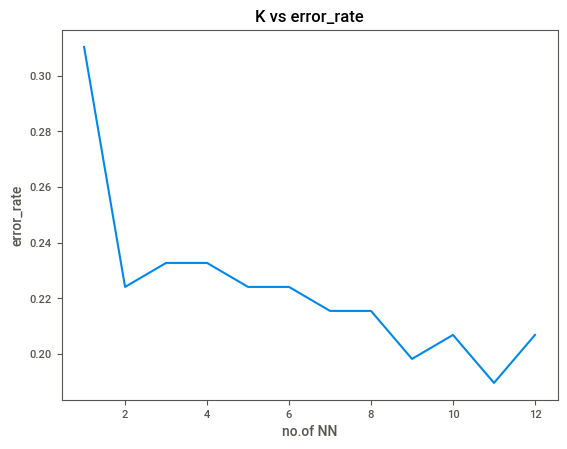

In [113]:
plt.plot(range(1,13),ERROR_RATE)
plt.xlabel('no.of NN')
plt.ylabel('error_rate')
plt.title('K vs error_rate')

In [114]:
knn1=KNeighborsClassifier(n_neighbors=7)

In [115]:
knn1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [116]:
y_pred_train_knn=knn1.predict(x_train)

In [117]:
a4=accuracy_score(y_train,y_pred_train_knn)
a4

0.8260869565217391

In [118]:
y_pred_test_knn=knn1.predict(x_test)

In [119]:
b4=accuracy_score(y_test,y_pred_test_knn)
b4

0.7844827586206896

In [120]:
knn2=KNeighborsClassifier()
knn2.fit(x_sm,y_sm)

KNeighborsClassifier()

In [121]:
y_pred=knn2.predict(x_test)

In [122]:
c4=accuracy_score(y_test,y_pred)
c4

0.7672413793103449

### Hyperparameter Tunnung

In [123]:
params={'n_neighbors' : range(1,40),'weights' : ['uniform','distance'],'metric' : ['minkowski','euclidean','manhattan']}  
knn=RandomizedSearchCV(KNeighborsClassifier(),param_distributions=params, verbose=2, cv=3, n_jobs = -1, random_state=42)
knn.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': range(1, 40),
                                        'weights': ['uniform', 'distance']},
                   random_state=42, verbose=2)

In [124]:
d4=knn.best_params_
d4

{'weights': 'distance', 'n_neighbors': 25, 'metric': 'euclidean'}

In [125]:
print(knn.best_estimator_)

KNeighborsClassifier(metric='euclidean', n_neighbors=25, weights='distance')


In [126]:
knn_classifier=KNeighborsClassifier(weights='distance',n_neighbors= 25 ,metric='euclidean')
knn_classifier.fit(x_train,y_train)
print(knn_classifier.score(x_test,y_test))

0.7758620689655172


In [127]:
knn_y_pred = knn.predict(x_test)
e4=accuracy_score(y_test,knn_y_pred)
e4

0.7758620689655172

In [128]:
# print classification report
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        87
           1       0.57      0.45      0.50        29

    accuracy                           0.78       116
   macro avg       0.70      0.67      0.68       116
weighted avg       0.76      0.78      0.77       116



## XGB

In [129]:
from xgboost import XGBClassifier

In [130]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [131]:
y_pred_train_xgb=xgb.predict(x_train)

In [132]:
a5=accuracy_score(y_train,y_pred_train_xgb)
a5

0.9326086956521739

In [133]:
y_pred_test_xgb=xgb.predict(x_test)

In [134]:
b5=accuracy_score(y_test,y_pred_test_xgb)
b5

0.7413793103448276

In [135]:
xgb1=XGBClassifier()
xgb1.fit(x_sm,y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [136]:
y_pred=xgb1.predict(x_test)

In [137]:
c5=accuracy_score(y_test,y_pred)
c5

0.75

### Hyperparameter Tunnung

In [138]:
param_grid={
    'max_depth':[3,5,7],
    'learning_rate':[0.01,0.1,0.3],
    'n_estimators':[100,200,300],
    'subsample':[0.8,0.9,1.0],
    'colsample_bytree':[0.8,0.9,1.0],
    'gamma':[0.1,0.2,0.3],
    'reg_alpha':[0.1,0.2,0.3],
    'reg_lambda':[0.1,0.2,0.3]
}

In [139]:
grid_search=GridSearchCV(estimator=xgb,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1)

In [140]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0.1, 0.2, 0.3],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'reg_alpha': [0.1, 0.2, 0.3],
                         'reg_lambda': [0.1, 0.2, 0.3],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [141]:
d5=grid_search.best_params_
d5

{'colsample_bytree': 1.0,
 'gamma': 0.2,
 'learning_rate': 0.01,
 'max_depth': 7,
 'n_estimators': 100,
 'reg_alpha': 0.3,
 'reg_lambda': 0.3,
 'subsample': 0.8}

In [142]:
grid_search.best_score_

0.7804347826086956

In [143]:
grid_search1=XGBClassifier(colsample_bytree = 1.0,gamma= 0.2,learning_rate= 0.01,max_depth= 7,n_estimators=100,reg_alpha= 0.3,reg_lambda= 0.3,subsample=0.8)


In [144]:
grid_search1.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [145]:
y_pred=grid_search1.predict(x_test)

In [146]:
e5=accuracy_score(y_test,y_pred)
e5

0.7758620689655172

In [147]:
predictions=pd.DataFrame({'model':['Random Forest','SVM','Decision Tree','KNN','XGB'] ,
                        'accuracy_score_train':[a1,a2,a3,a4,a5],
                      'accuracy_score_test':[b1,b2,b3,b4,b5],
                         'accuracy_score_smote_test':[c1,c2,c3,c4,c5]})

In [148]:
predictions

,model,accuracy_score_train,accuracy_score_test,accuracy_score_smote_test
0,Random Forest,0.943478,0.741379,0.724138
1,SVM,0.780435,0.758621,0.672414
2,Decision Tree,0.943478,0.672414,0.646552
3,KNN,0.826087,0.784483,0.767241
4,XGB,0.932609,0.741379,0.750000


In [149]:
hyperparameter_predictions=pd.DataFrame({'model':['Random Forest','SVM','Decision Tree','KNN','XGB'] ,
                        'best params':[d1,d2,d3,d4,d5],
                      'accuracy_score_test':[e1,e2,e3,e4,e5],
                         })

In [150]:
hyperparameter_predictions

,model,best params,accuracy_score_test
0,Random Forest,"{'n_estimators': 1000, 'min_samples_split': 10...",0.750000
1,SVM,"{'kernel': 'rbf', 'gamma': 0.001, 'C': 641}",0.750000
2,Decision Tree,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",0.775862
3,KNN,"{'weights': 'distance', 'n_neighbors': 25, 'me...",0.775862
4,XGB,"{'colsample_bytree': 1.0, 'gamma': 0.2, 'learn...",0.775862


[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   0.7s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   0.6s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.5s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.5s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.5s
[CV] END bootstrap=False, max_depth=7

#### From the above observation we can say that the performance of XGB model is good as compared to other models followed by Random Forest,SVM,Decision Tree, KNN. So we will save XGB model for further testing of the data using pickle library.

In [151]:
import pickle

file = open('blood_donation.pkl','wb')
pickle.dump(xgb,file)